In [18]:
%reload_ext autoreload 
%autoreload 2
%matplotlib inline 
#외부에서 import한 모듈을 자동 리로드하는 방법
#외부에서 import한 모듈을 자동 리로드하는 방법 
# %autoreaload 2의 의미 = 파이썬 코드를 실행하기 전에 항상 모든 모듈을 Reload
#그림, 소리, 에니메이션과 같은(Rich output)을 notebook에서 
#바로 그림을 볼 수 있게 해주는것

In [19]:
#mateplotlib은 다양한 차트와 플롯 스타일을 지원해주는 패키지이다.
#graphviz는 다이어그램을 보이는데 효율적인 모듈
import graphviz
from matplotlib import pyplot as plt
from matplotlib import rcParams #차트의 기본 크기를 조정할 수 있다.
import numpy as np #과학 계산을 위한 라이브러리 => 다차원 배열을 처리하는데 사용
from pathlib import Path #pathlib의 기본 아이디어 = 파일시스템 경로를 단순한
#문자열이 아니라 객체로 다루는것이다. => 파일위치 찾기, 파일 입출력 동작 등등
#ex) file_path = './path/to/file'   =>   p = Path(file_path)
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import warnings

In [20]:
#크기 설정
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

In [21]:
#데이터 로드
data_dir = Path('../data/dacon-dku')
sub_dir = Path('../build/sub')

trn_file = data_dir / 'train.csv'
tst_file = data_dir / 'test.csv'
sample_file = data_dir / 'sample_submission.csv'

target_col = 'class'
seed = 42

In [23]:
algo_name = 'dt'
feature_name = 'j1'
model_name = f'{algo_name}_{feature_name}'

sub_file = sub_dir / f'{model_name}.csv'

In [24]:
trn = pd.read_csv(trn_file, index_col=0)
tst = pd.read_csv(tst_file, index_col=0)
y = trn[target_col]
trn.drop(target_col, axis=1, inplace=True)
print(y.shape, trn.shape, tst.shape)
trn.head()

(320000,) (320000, 18) (80000, 18)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z
id,,,,,,,,,,,,,,,,,,
0,23.2640,20.3368,19.0095,17.6724,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,18,18,1.1898,1.1907,1.1890,1.1894,1.1902
1,15.0521,14.0620,13.4524,13.2684,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,1,1,1.2533,1.2578,1.2488,1.2510,1.2555
2,16.7864,15.8254,15.5363,15.3935,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,2,2,1.0225,1.0241,1.0210,1.0217,1.0233
3,25.6606,21.1887,20.2212,19.8949,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,4,3,1.2054,1.2061,1.2049,1.2051,1.2057
4,24.4534,20.6992,19.0424,18.3242,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,13,12,1.1939,1.1943,1.1937,1.1938,1.1941


In [25]:
#결정트리
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
clf.fit(trn, y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)

In [8]:
print(f'{accuracy_score(y, clf.predict(trn)) * 100:.4f}%')

88.8669%


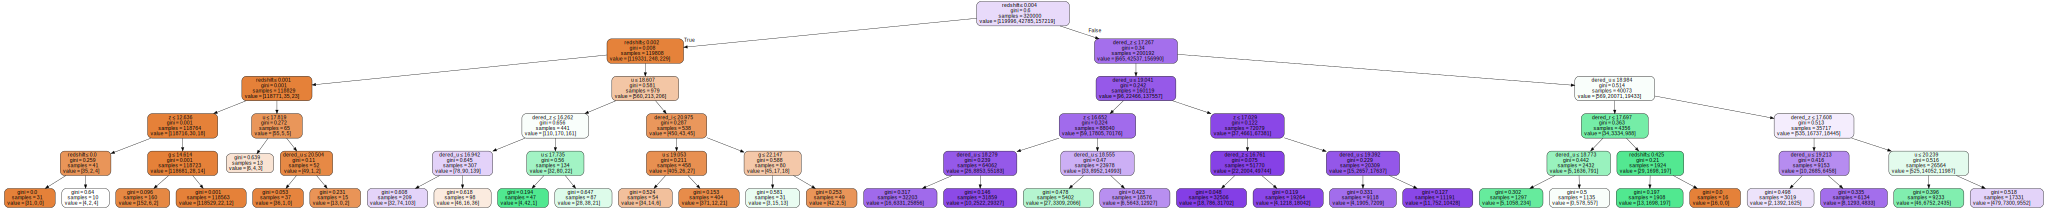

In [9]:
#결정트리 시각화
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=trn.columns,
                           filled=True,
                           rounded=True,
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [10]:
#시험데이터 예측
sub = pd.read_csv(sample_file, index_col=0)
print(sub.shape)
sub.head()

(80000, 1)


,class
id,
320000,0
320001,0
320002,0
320003,0
320004,0


In [11]:
sub[target_col] = clf.predict(tst)
sub.head()

,class
id,
320000,2
320001,0
320002,2
320003,0
320004,2


In [26]:
#저장
sub.to_csv(sub_file)